In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#reading the dataset to create dataframe
fruits = pd.read_table('fruit_data_with_colors.txt')


c:\users\ckcheruiyot\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [16]:
#get the first five rows to see how dataframe looks like
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
#getting the rows and columns of the dataframe
fruits.shape

(59, 7)

In [15]:
#get all the values inside the fruit name columns
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [18]:
#getting the items in fruit name category and their totals
#also can be achieved using print(fruits.groupby('fruit_name').size())
fruits['fruit_name'].value_counts()    

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [19]:
#getting a quick statistical overview of dataframe
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [21]:
#seeing data types in the various columns
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


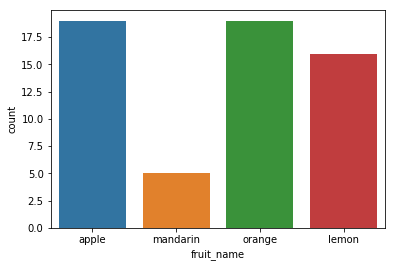

In [22]:
#plotting to visualize data
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

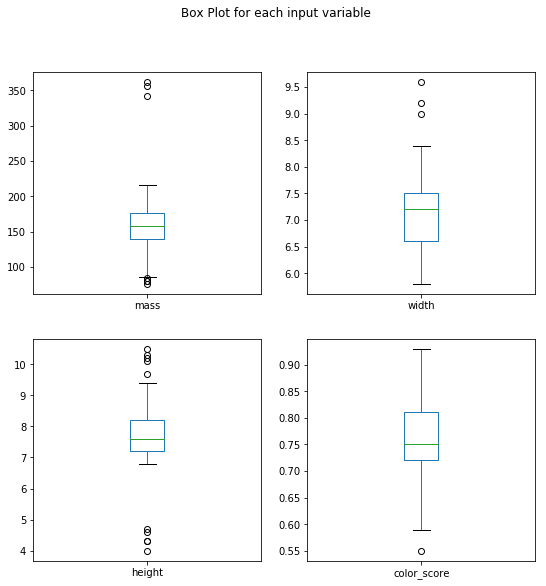

In [27]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

In [33]:
fruit_distribution = fruits.groupby('fruit_name').size() #distribution by fruit type

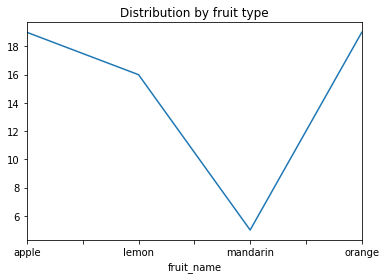

In [34]:
fruit_distribution.plot(title='Distribution by fruit type')

In [39]:
#drop fruit label column
fruits = fruits.drop('fruit_label', axis=1)
#select all numerical  values
fruits_num = fruits.select_dtypes(include=['float64', 'int64'])
fruits_num.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8947F1978>,
      dtype=object)

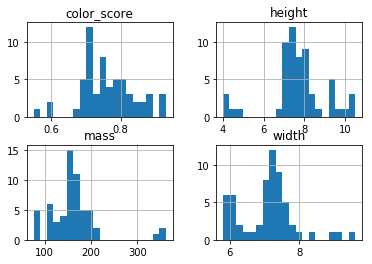

In [42]:
#plotting all the histograms for the given features
fruits_num.hist(bins=20)

In [53]:
fruits_correlation = fruits_num.corr()['mass'][:-1]

In [54]:
fruits_correlation

mass      1.000000
width     0.877687
height    0.609571
Name: mass, dtype: float64

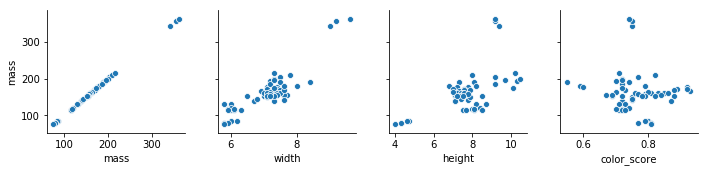

In [57]:
#correlation plots using pairplots
for i in range(0, len(fruits_num.columns), 5):
    sns.pairplot(fruits_num, y_vars=['mass'], x_vars = fruits_num.columns[i:i+5])